In [2]:
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [6]:
class Graph:
    def __init__(self, n):
        self.n = n
        self.adjmat = []
        
        for i in range(n):
            self.adjmat.append([0 for j in range(n)])
    
    def addedge(self, u, v):
        self.adjmat[u][v] = 1
        
    def visualize(self):
        g = nx.from_numpy_matrix(np.matrix(self.adjmat), create_using=nx.DiGraph())
        nx.draw(g, with_labels=True, node_size=500, alpha=0.8)

In [7]:
def findcycles(graph):
    indegree = [0 for i in range(graph.n)]
    
    for i in range(graph.n):
        for j in range(graph.n):
            if graph.adjmat[i][j] == 1:
                indegree[j] += 1
    
    visited = 0
    
    q = deque()
    
    for i in range(graph.n):
        if indegree[i] == 0:
            q.append(i)
    
    while q:
        v = q.popleft()
        visited += 1
        
        for i in range(graph.n):
            if graph.adjmat[v][i] == 1:
                indegree[i] -= 1
                
                if indegree[i] == 0:
                    q.append(i)
        
    if visited != graph.n: 
        print("Cycles Detected in Graph...")
    else:
        print("The Graph is Acyclic...")

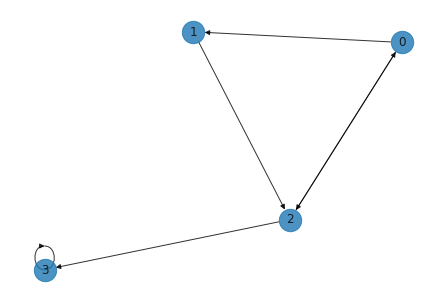

In [8]:
edges = [(0,1), (0,2), (1,2), (2,0), (2,3), (3,3)]

g = Graph(4)
for i, j in edges:
    g.addedge(i, j)
    
g.visualize()

In [9]:
findcycles(g)

Cycles Detected in Graph...


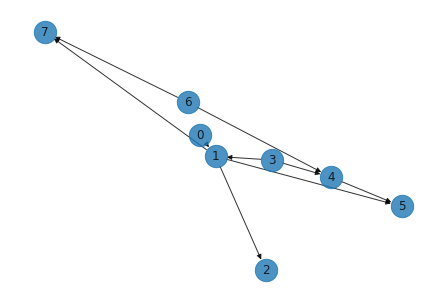

In [10]:
edges = [(0,1), (1,2), (1,5), (1,7), (3,1), (3,4), (4,5), (6,4), (6,7)]

g = Graph(8)
for i, j in edges:
    g.addedge(i, j)
    
g.visualize()

In [11]:
findcycles(g)

The Graph is Acyclic...


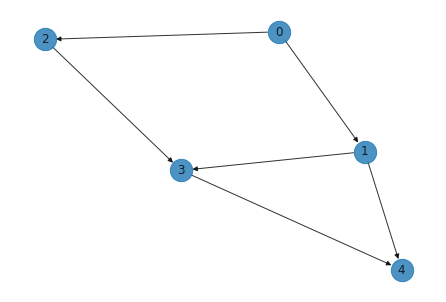

In [12]:
edges = [(0,1), (0,2), (1,4), (1,3), (2,3), (3,4)]

g = Graph(5)
for i, j in edges:
    g.addedge(i, j)
    
g.visualize()

In [13]:
findcycles(g)

The Graph is Acyclic...
